### K-Means Clustering

#### K-Means Algorithm Implementation

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [10]:
X,y  = make_blobs(n_samples=500,n_features=2,centers=5,random_state=10)

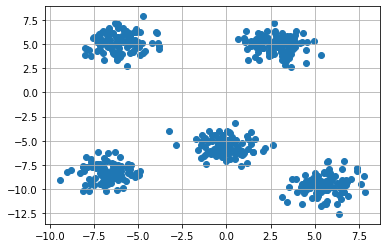

In [11]:
plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [12]:
k = 5
color  = ["green","red","blue","yellow","orange"]

clusters = {}

for i in range(k):
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    
    cluster = {
        'center':center,
        'points':points,
        'color': color[i]
        }
    
    clusters[i] = cluster

In [13]:
clusters

{0: {'center': array([ 8.0945114 , -6.58052212]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-1.12362703, -9.25999352]),
  'points': [],
  'color': 'red'},
 2: {'center': array([-2.64468797, -1.09856363]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([ 7.53472254, -4.82083706]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([ 5.58558206, -0.81062533]),
  'points': [],
  'color': 'orange'}}

In [14]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [15]:
def assignPointToClusters(clusters): #E-Step
    for ix in range(X.shape[0]):
        dist = []
        curr_x = X[ix]

        for kx in range(k):
            d = distance(curr_x,clusters[kx]['center'])
            dist.append(d)

        current_cluster = np.argmin(dist)    
        clusters[current_cluster]['points'].append(curr_x)
        
def updateClusters(clusters): # M-Step -> We update every cluster center according to the mean of the points in it
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0: # If a cluster has some-nonzero points
            new_u = pts.mean(axis=0)
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = []
                

def plotClusters(clusters):
    
    for kx in range(k):        
            pts = np.array(clusters[kx]['points'])
            # Plot the points
            try:
                    plt.scatter(pts[:,0],pts[:,1],color = clusters[kx]['color'])
            except:
                    pass

            # Plot the cluster center
            uk = clusters[kx]['center']
            plt.scatter(uk[0],uk[1],color="black",marker="*") 


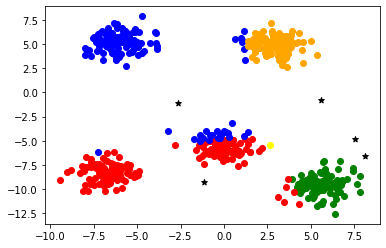

In [17]:
plotClusters(clusters)

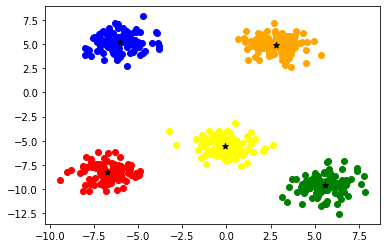

In [24]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)